# Mainly Work

## - Use the geopandas to Visualize the data
## - Use K-means clustering to cluster the GPS Coordinates
## - ARIMA Model for Time Series Forecasting
## -Tensorflow for the Classify structured data

In [463]:
# Common imports
import numpy as np
import os
import tarfile
from six.moves import urllib
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import geopandas as gpd
from shapely.geometry import Point,Polygon

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore", message="FutureWarning")


This dataset includes all Theft from Motor Vehicle occurrences by reported date and related offences from 2014 to June 30, 2022.Auto Theft Dashboard -Download DocumentationThe 
Theft from Motor Vehicle offences include 
- Theft from Motor Vehicle Under 
- Theft from Motor Vehicle Over.
This data is provided at the offence and/or victim level, 

therefore one occurrence number may have several rows of data associated to the various offences used to categorize the occurrence.

This data does not include occurrences that have been deemed unfounded. The definition of unfounded according to Statistics Canada is: “It has been determined through police investigation that the offence reported did not occur, nor was it attempted” (Statistics Canada, 2020).

**The dataset is intended to provide communities with information regarding public safety and awareness. The data supplied to the Toronto Police Service by the reporting parties is preliminary and may not have been fully verified at the time of publishing the dataset.  

The location of crime occurrences have been deliberately offset to the nearest road intersection node to protect the privacy of parties involved in the occurrence. All location data must be considered as an approximate location of the occurrence and users are advised not to interpret any of these locations as related to a specific address or individual.

NOTE: Due to the offset of occurrence location, the numbers by Division and Neighbourhood may not reflect the exact count of occurrences reported within these geographies. Therefore, the Toronto Police Service does not guarantee the accuracy, completeness, timeliness of the data and it should not be compared to any other source of crime data.By accessing these datasets, the user agrees to full acknowledgement of the Open Government Licence - Ontario.In accordance with the Municipal Freedom of Information and Protection of Privacy Act, the Toronto Police Service has taken the necessary measures to protect the privacy of individuals involved in the reported occurrences. No personal information related to any of the parties involved in the occurrence will be released as open data. 

** Statistics Canada. 2020. Uniform Crime Reporting Manual. Surveys and Statistical Programs. Canadian Centre for Justice Statistics.


In [464]:
df=pd.read_csv('Theft_from_Motor_Vehicle.csv')

In [465]:
df.head()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.835512e+06,5.418252e+06,1,GO-20141260616,D53,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2142,...,1.0,1.0,Wednesday,2,NonMCI,56,Leaside-Bennington,-79.370758,43.694274,1
1,-8.844479e+06,5.422776e+06,2,GO-20149000010,D32,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,15,NonMCI,31,Yorkdale-Glen Park,-79.451310,43.723650,2
2,-8.836012e+06,5.410878e+06,3,GO-20141261694,D51,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,2142,...,1.0,1.0,Wednesday,1,NonMCI,77,Waterfront Communities-The Island,-79.375245,43.646361,3
3,-8.849244e+06,5.422821e+06,4,GO-20141262668,D31,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,18,NonMCI,26,Downsview-Roding-CFB,-79.494115,43.723947,4
4,-8.838679e+06,5.410277e+06,5,GO-20141261604,D14,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,16,NonMCI,77,Waterfront Communities-The Island,-79.399201,43.642458,5


In [466]:
df.describe()

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Longitude,Latitude,ObjectId
count,7.691400e+04,7.691400e+04,76914.000000,76914.000000,76914.0,76914.000000,76914.000000,76914.000000,76914.000000,76898.000000,76898.000000,76898.000000,76914.000000,76914.000000,76914.000000,76914.000000
mean,-8.742287e+06,5.360881e+06,38457.500000,2141.684973,200.0,2017.801766,15.759901,179.727267,13.175807,2017.770280,15.470884,180.484096,13.321658,-78.533298,43.228878,38457.500000
std,9.181687e+05,5.630450e+05,22203.303639,1.746731,0.0,2.473924,8.595575,104.297899,5.079989,2.492578,8.637461,104.413018,7.495993,8.248050,4.540100,22203.303639
min,-8.897945e+06,0.000000e+00,1.000000,2132.000000,200.0,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,-79.931603,0.000000,1.000000
25%,-8.846932e+06,5.412939e+06,19229.250000,2142.000000,200.0,2016.000000,8.000000,90.000000,10.000000,2016.000000,8.000000,91.000000,7.000000,-79.473343,43.659759,19229.250000
50%,-8.838336e+06,5.418580e+06,38457.500000,2142.000000,200.0,2018.000000,16.000000,177.000000,13.000000,2018.000000,15.000000,179.000000,15.000000,-79.396125,43.696405,38457.500000
75%,-8.830263e+06,5.426687e+06,57685.750000,2142.000000,200.0,2020.000000,23.000000,270.000000,17.000000,2020.000000,23.000000,271.000000,20.000000,-79.323599,43.749035,57685.750000
max,0.000000e+00,5.477833e+06,76914.000000,2142.000000,200.0,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,0.000000,44.080012,76914.000000


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76914 entries, 0 to 76913
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    76914 non-null  float64
 1   Y                    76914 non-null  float64
 2   Index_               76914 non-null  int64  
 3   event_unique_id      76914 non-null  object 
 4   Division             76914 non-null  object 
 5   occurrencedate       76914 non-null  object 
 6   reporteddate         76914 non-null  object 
 7   location_type        76914 non-null  object 
 8   premises_type        76914 non-null  object 
 9   ucr_code             76914 non-null  int64  
 10  ucr_ext              76914 non-null  int64  
 11  Offence              76914 non-null  object 
 12  reportedyear         76914 non-null  int64  
 13  reportedmonth        76914 non-null  object 
 14  reportedday          76914 non-null  int64  
 15  reporteddayofyear    76914 non-null 

In [468]:
columns_1=['X','Y','Index_',
        'reportedyear','reportedmonth','reportedday','reporteddayofyear',
         'reporteddayofweek','reportedhour',
         'occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear',
         'occurrencedayofweek','occurrencehour','ObjectId',
         'ucr_code','ucr_ext']

df.drop(columns_1,inplace=True,axis=1)
 

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76914 entries, 0 to 76913
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_unique_id  76914 non-null  object 
 1   Division         76914 non-null  object 
 2   occurrencedate   76914 non-null  object 
 3   reporteddate     76914 non-null  object 
 4   location_type    76914 non-null  object 
 5   premises_type    76914 non-null  object 
 6   Offence          76914 non-null  object 
 7   mci_category     76914 non-null  object 
 8   Hood_ID          76914 non-null  object 
 9   Neighbourhood    76914 non-null  object 
 10  Longitude        76914 non-null  float64
 11  Latitude         76914 non-null  float64
dtypes: float64(2), object(10)
memory usage: 7.0+ MB


# Visualize the dataset

In [470]:
df = df[(df[['Longitude']] != 0).all(axis=1)]

In [471]:
df['occurrencedate']=pd.to_datetime(df['occurrencedate'])

In [472]:
df.drop(df[df.occurrencedate < '2014-01'].index,inplace=True)

<AxesSubplot:xlabel='tmpMon'>

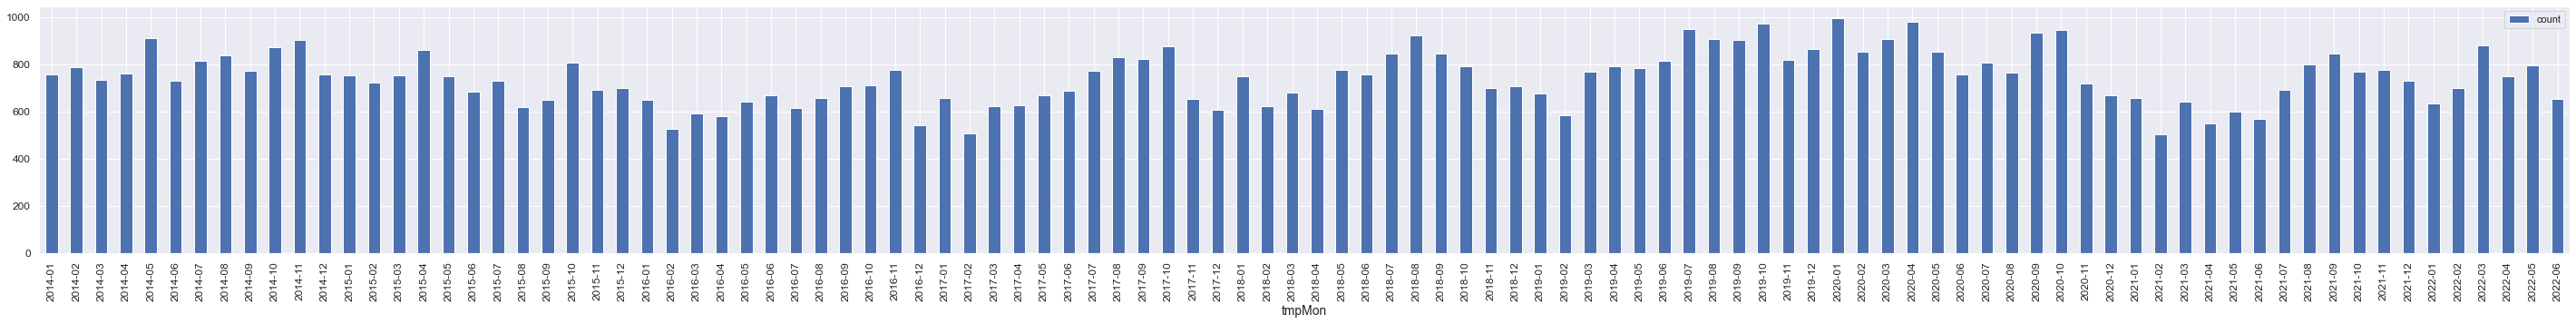

In [473]:
# create a representation of the month with strfmt
df['tmpMon'] = df['occurrencedate'].map(lambda dt: dt.strftime('%Y-%m'))

grouped_df = df.groupby('tmpMon').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='tmpMon', y='count',figsize=(50, 5))

<AxesSubplot:xlabel='tmpYear'>

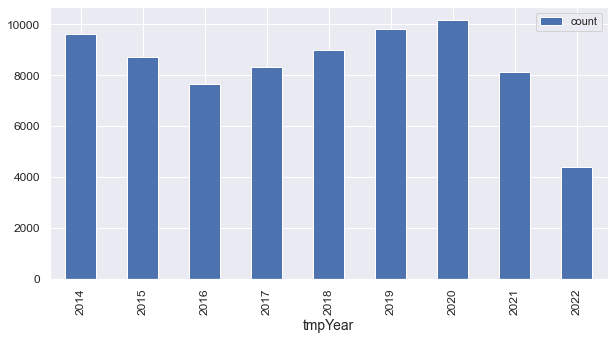

In [474]:
# create a representation of the year with stryear
df['tmpYear'] = df['occurrencedate'].map(lambda dt: dt.strftime('%Y'))

grouped_df = df.groupby('tmpYear').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='tmpYear', y='count',figsize=(10, 5))

<AxesSubplot:xlabel='premises_type'>

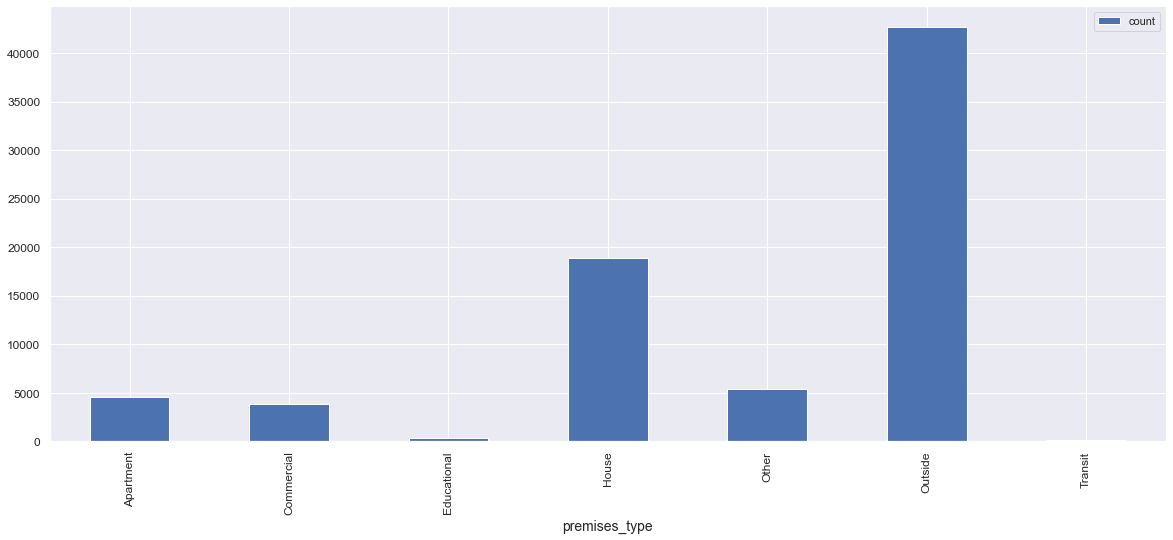

In [475]:
grouped_df = df.groupby('premises_type').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='premises_type', y='count',figsize=(20, 8))

<AxesSubplot:xlabel='Division'>

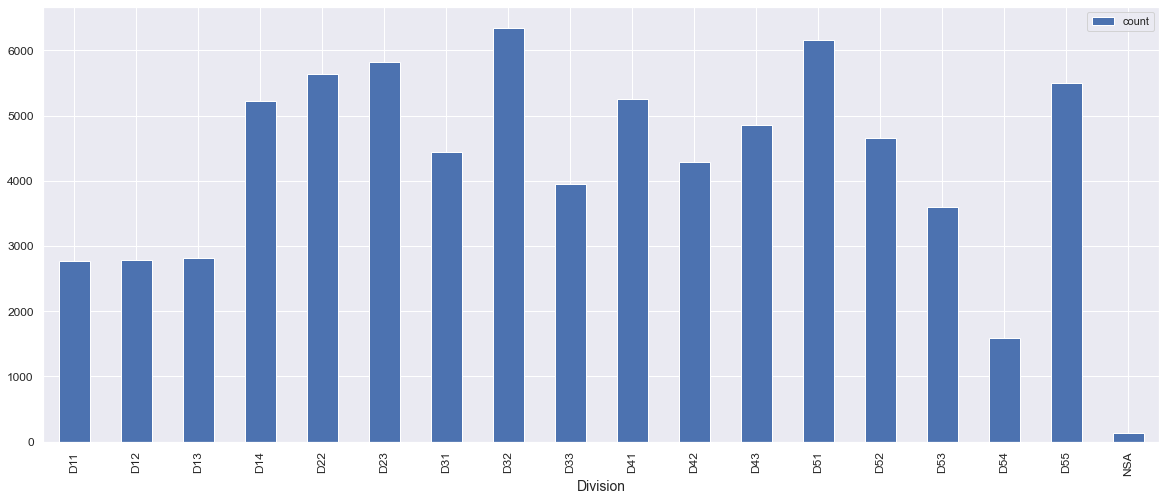

In [476]:
grouped_df = df.groupby('Division').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='Division', y='count',figsize=(20, 8))

<AxesSubplot:xlabel='Neighbourhood'>

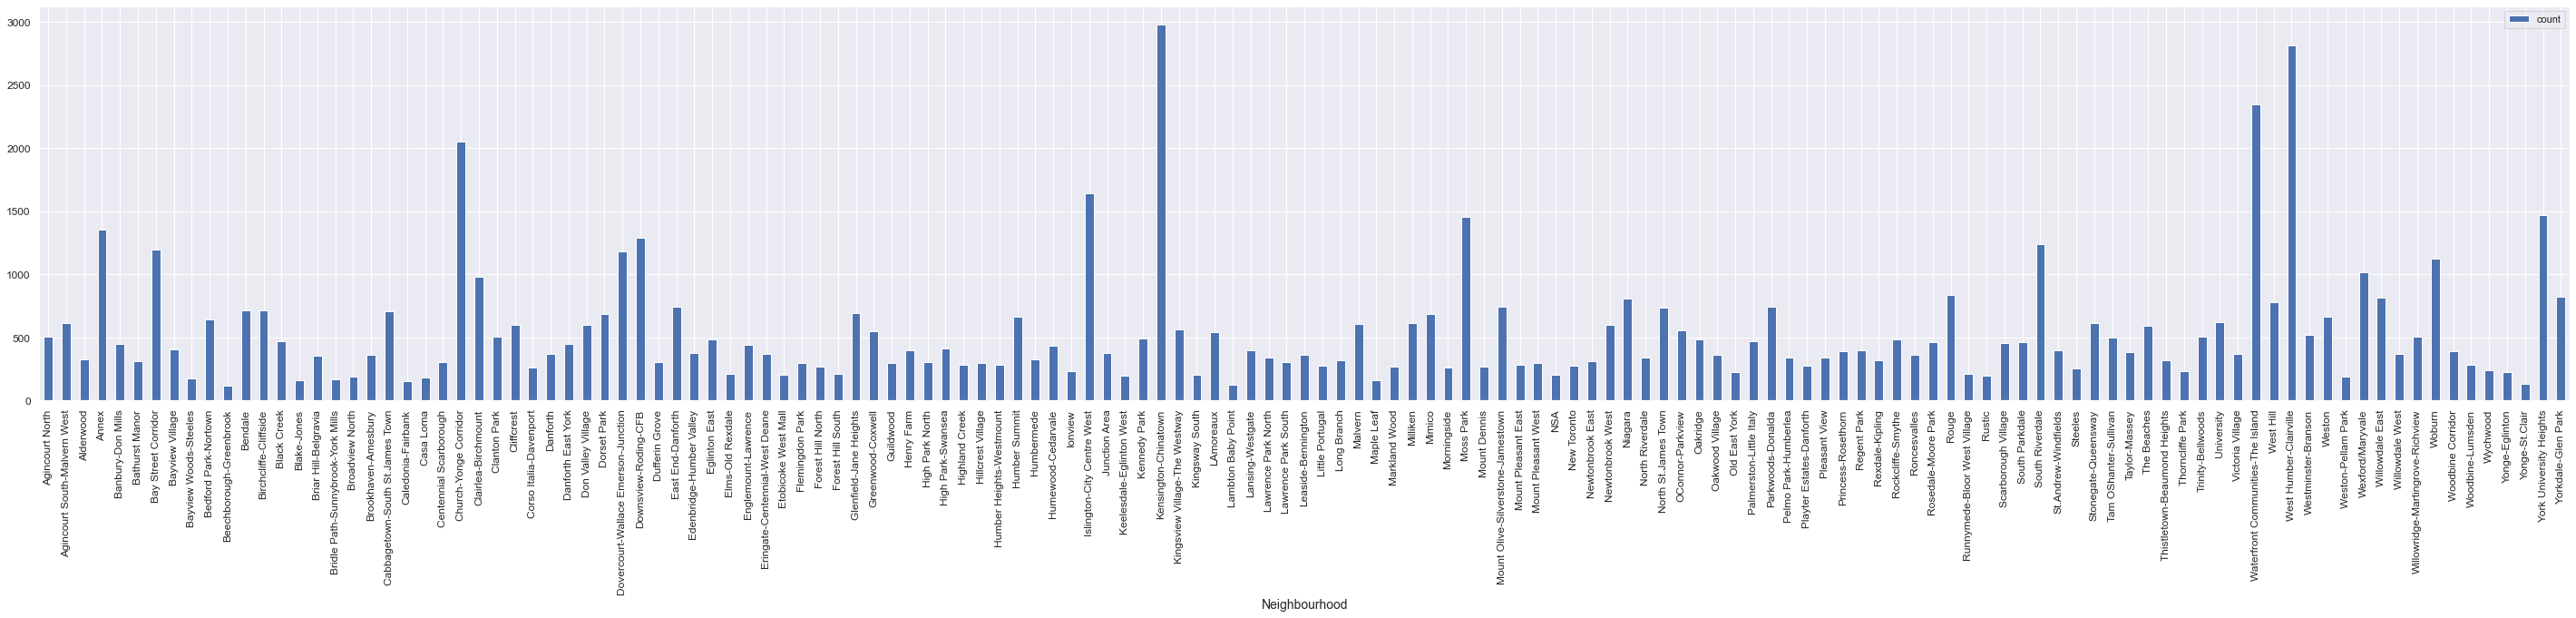

In [477]:
grouped_df = df.groupby('Neighbourhood').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='Neighbourhood', y='count',figsize=(50, 8))

In [478]:
fp = r"Neighbourhoods - 4326"
map_df = gpd.read_file(fp)
map_df.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,geometry
0,1,2502366,26022881,None,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,None,17824737,"POLYGON ((-79.38635 43.69783, -79.38623 43.697..."
1,2,2502365,26022880,None,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,None,17824753,"POLYGON ((-79.39744 43.70693, -79.39837 43.706..."
2,3,2502364,26022879,None,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,None,17824769,"POLYGON ((-79.43411 43.66015, -79.43537 43.659..."
3,4,2502363,26022878,None,171,171,Junction-Wallace Emerson,Junction-Wallace Emerson (171),Not an NIA or Emerging Neighbourhood,None,17824785,"POLYGON ((-79.43870 43.66766, -79.43841 43.666..."
4,5,2502362,26022877,None,170,170,Yonge-Bay Corridor,Yonge-Bay Corridor (170),Not an NIA or Emerging Neighbourhood,None,17824801,"POLYGON ((-79.38404 43.64497, -79.38502 43.644..."


In [479]:
geometry=[Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]

In [480]:
crs={'init':'epsg:4326'}
geo_df=gpd.GeoDataFrame(df,
                       crs=crs,
                       geometry=geometry)
geo_df.head()

C:\Users\Anaconda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,Offence,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,tmpMon,tmpYear,geometry
0,GO-20141260616,D53,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,56,Leaside-Bennington,-79.370758,43.694274,2014-01,2014,POINT (-79.37076 43.69427)
2,GO-20141261694,D51,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Theft From Motor Vehicle Under,NonMCI,77,Waterfront Communities-The Island,-79.375245,43.646361,2014-01,2014,POINT (-79.37525 43.64636)
6,GO-20141261501,D51,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,73,Moss Park,-79.374527,43.657066,2014-01,2014,POINT (-79.37453 43.65707)
14,GO-20141263347,D42,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,130,Milliken,-79.277134,43.817308,2014-01,2014,POINT (-79.27713 43.81731)
16,GO-20141262977,D11,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,85,South Parkdale,-79.465247,43.636355,2014-01,2014,POINT (-79.46525 43.63635)


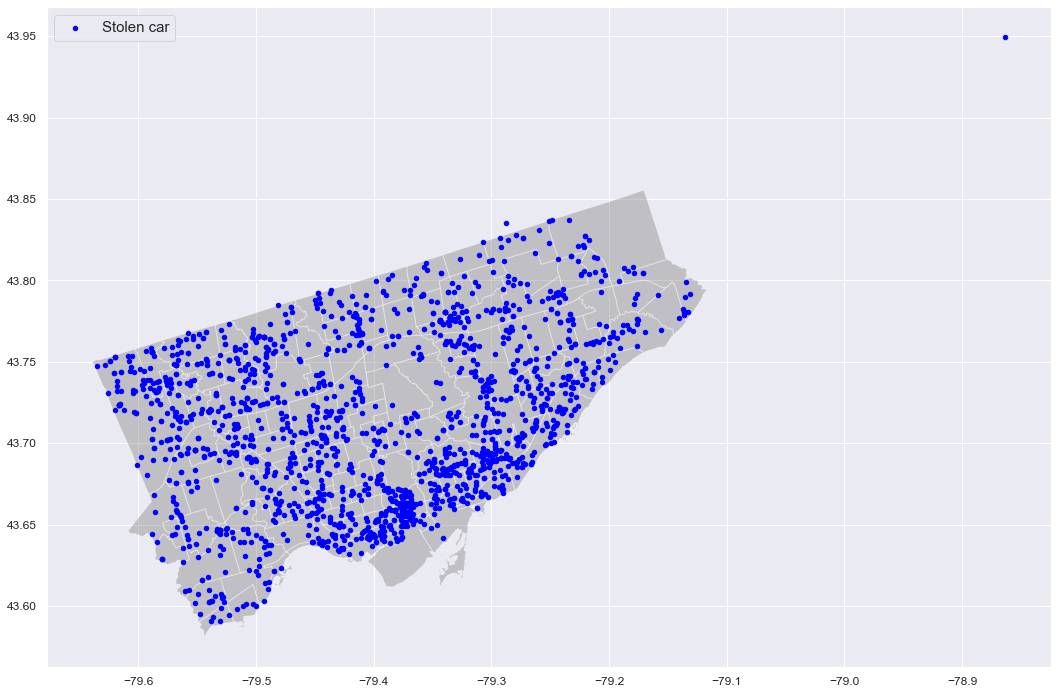

In [481]:
start_date = '01-01-2021'
end_date = '04-01-2021'
fig,ax=plt.subplots(figsize=(18,18))
map_df.plot(ax=ax,alpha=0.4,color='grey')
geo_df.loc[(geo_df['occurrencedate'] >= start_date) & (geo_df['occurrencedate'] < end_date)].plot(ax=ax,markersize=20,color='blue',marker='o',label='Stolen car')
plt.legend(prop={'size':15})

# Clustering GPS Coordinates and Forming Regions

K-means is somewhat naive — it clusters the data into k clusters, even if k is not the right number of clusters to use. When we come to clustering, it’s hard to know how many clusters are optimal… In our dataset, how many clusters are optimal i.e. make sense, we don’t want to guess now do we? Therefore, when using k-means clustering, we need a way to determine whether we are using the right number of clusters.

## k-means clustering

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).

When K increases, the centroids are closer to the clusters centroids. The improvements will decline rapidly at some point, creating the elbow shape. That is the optimal value for K.

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75856 entries, 0 to 76913
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   event_unique_id  75856 non-null  object             
 1   Division         75856 non-null  object             
 2   occurrencedate   75856 non-null  datetime64[ns, UTC]
 3   reporteddate     75856 non-null  object             
 4   location_type    75856 non-null  object             
 5   premises_type    75856 non-null  object             
 6   Offence          75856 non-null  object             
 7   mci_category     75856 non-null  object             
 8   Hood_ID          75856 non-null  object             
 9   Neighbourhood    75856 non-null  object             
 10  Longitude        75856 non-null  float64            
 11  Latitude         75856 non-null  float64            
 12  tmpMon           75856 non-null  object             
 13  tmpYear         

In [483]:
X=df.loc[:,['event_unique_id','Latitude','Longitude']]
X.head(10)
 

,event_unique_id,Latitude,Longitude
0,GO-20141260616,43.694274,-79.370758
2,GO-20141261694,43.646361,-79.375245
6,GO-20141261501,43.657066,-79.374527
14,GO-20141263347,43.817308,-79.277134
16,GO-20141262977,43.636355,-79.465247
17,GO-20141263029,43.622969,-79.481174
18,GO-20141263714,43.718907,-79.304428
19,GO-20141263153,43.690818,-79.565980
25,GO-20149000033,43.654456,-79.418745
28,GO-20149000046,43.652274,-79.401107


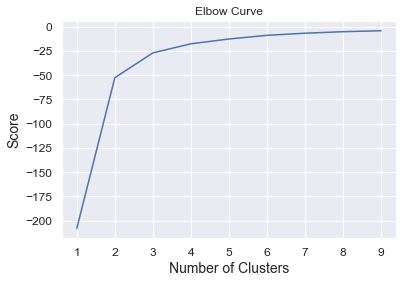

In [484]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

When we graph the plot, we see that the graph levels off slowly after 3 or 4 clusters. This implies that addition of more clusters will not help us that much.


In [521]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
geo_df['cluster_label'] = X['cluster_label']
geo_df.head(10)

,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,Offence,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,tmpMon,tmpYear,geometry,cluster_label
0,GO-20141260616,D53,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,56,Leaside-Bennington,-79.370758,43.694274,2014-01,2014,POINT (-79.37076 43.69427),5
2,GO-20141261694,D51,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Theft From Motor Vehicle Under,NonMCI,77,Waterfront Communities-The Island,-79.375245,43.646361,2014-01,2014,POINT (-79.37525 43.64636),5
6,GO-20141261501,D51,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,73,Moss Park,-79.374527,43.657066,2014-01,2014,POINT (-79.37453 43.65707),5
14,GO-20141263347,D42,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,130,Milliken,-79.277134,43.817308,2014-01,2014,POINT (-79.27713 43.81731),1
16,GO-20141262977,D11,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,85,South Parkdale,-79.465247,43.636355,2014-01,2014,POINT (-79.46525 43.63635),0
17,GO-20141263029,D22,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,17,Mimico,-79.481174,43.622969,2014-01,2014,POINT (-79.48117 43.62297),0
18,GO-20141263714,D54,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,43,Victoria Village,-79.304428,43.718907,2014-01,2014,POINT (-79.30443 43.71891),2
19,GO-20141263153,D23,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,NonMCI,7,Willowridge-Martingrove-Richview,-79.565980,43.690818,2014-01,2014,POINT (-79.56598 43.69082),3
25,GO-20149000033,D14,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,NonMCI,81,Trinity-Bellwoods,-79.418745,43.654456,2014-01,2014,POINT (-79.41874 43.65446),5
28,GO-20149000046,D14,2014-01-01 05:00:00+00:00,2014/01/01 05:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft From Motor Vehicle Under,NonMCI,78,Kensington-Chinatown,-79.401107,43.652274,2014-01,2014,POINT (-79.40111 43.65227),5


###  Visualize the Results

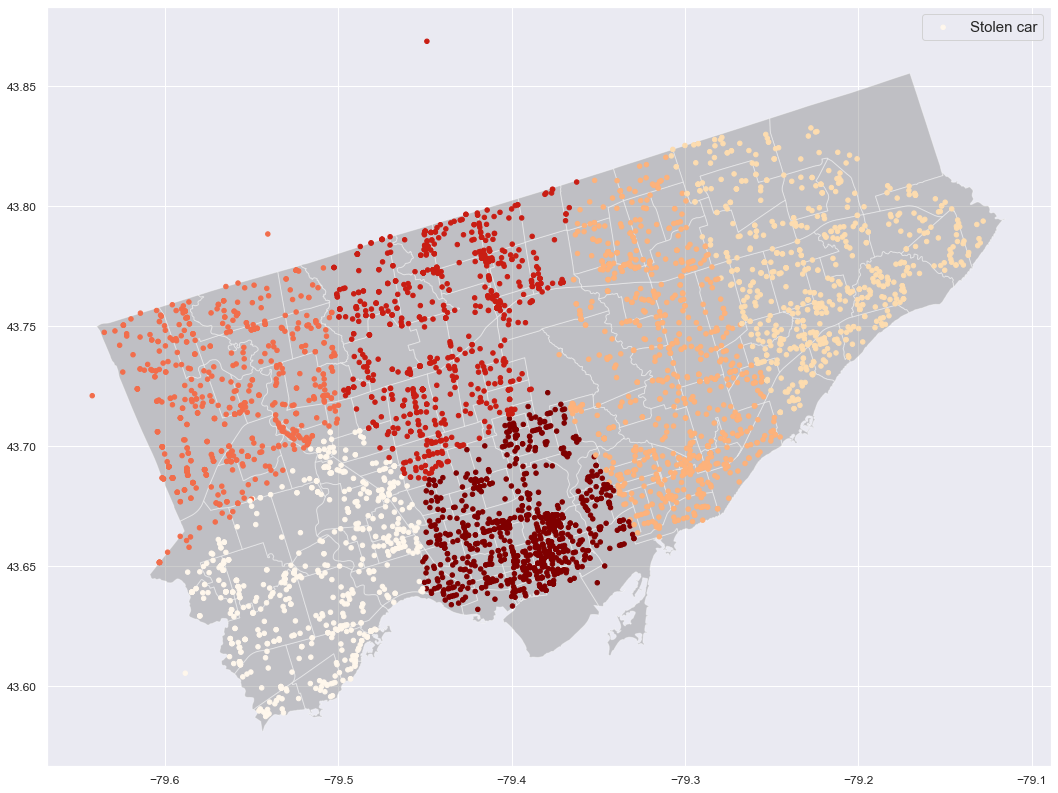

In [522]:
start_date = '01-01-2022'
end_date = '07-01-2022'
fig,ax=plt.subplots(figsize=(18,18))
map_df.plot(ax=ax,alpha=0.4,color='grey')
geo_df.loc[(geo_df['occurrencedate'] >= start_date) & (geo_df['occurrencedate'] < end_date)].plot(column='cluster_label', cmap='OrRd',ax=ax,markersize=20,marker='o',label='Stolen car')
plt.legend(prop={'size':15})

# Create an ARIMA Model for Time Series Forecasting

<AxesSubplot:xlabel='tmpMon'>

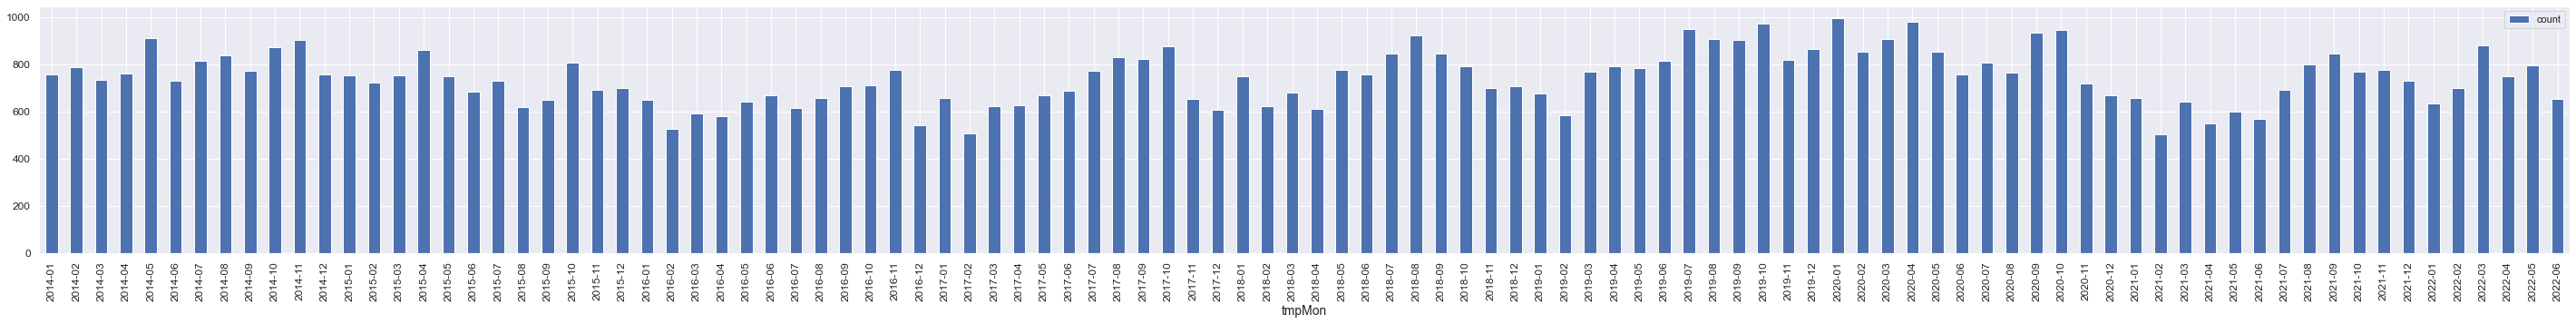

In [487]:
# create a representation of the month with strfmt
#df['tmpMon'] = df['occurrencedate'].map(lambda dt: dt.strftime('%Y-%m'))

arima_df = df.groupby('tmpMon').size().to_frame("count").reset_index()
arima_df.plot(kind='bar', x='tmpMon', y='count',figsize=(50, 5))

In [488]:
#df['Date']= pd.to_datetime(df['Date'])
arima_df['tmpMon']=pd.to_datetime(arima_df['tmpMon'])
arima_df.set_index('tmpMon',inplace=True)

<AxesSubplot:xlabel='tmpMon'>

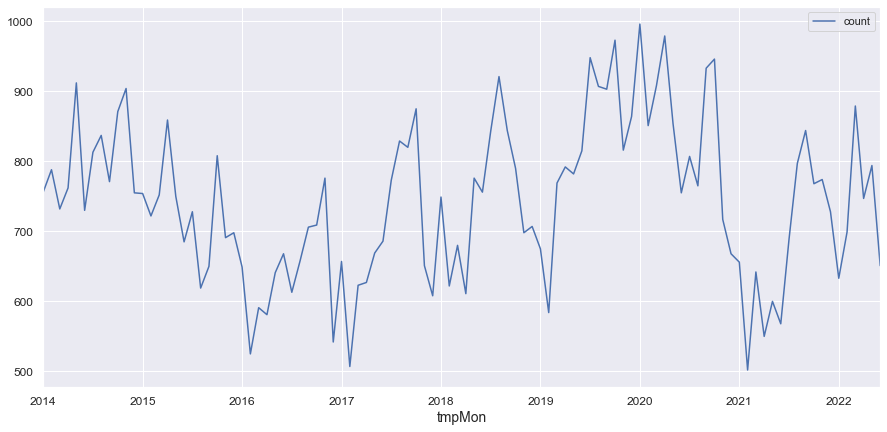

In [489]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
arima_df.plot()

In [490]:
from statsmodels.tsa.stattools import adfuller

In [491]:
test_result=adfuller(arima_df['count'])

In [492]:
def adfuller_test(count):
    result=adfuller(count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(arima_df['count'])

ADF Test Statistic : -3.532957879826696
p-value : 0.007179927463230287
#Lags Used : 1
Number of Observations : 100
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


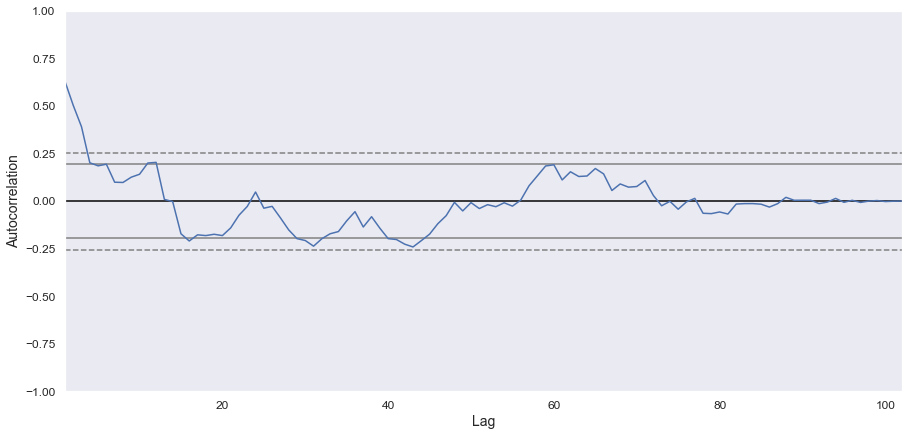

In [493]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(arima_df['count'])
plt.show()

In [494]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(arima_df['count'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\Anaconda\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  102
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -596.260
Date:                Mon, 21 Nov 2022   AIC                           1198.519
Time:                        21:10:54   BIC                           1206.365
Sample:                    01-01-2014   HQIC                          1201.695
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5292      0.127      4.174      0.000       0.281       0.778
ma.L1         -0.8931      0.074    -12.024      0.000      -1.039      -0.747
sigma2      7806.8826   1331.084      5.865      0.000    5198.005    1.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.46   Prob(JB):                         0.30
Heteroskedasticity (H):               1.75   Skew:                            -0.21
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='tmpMon'>

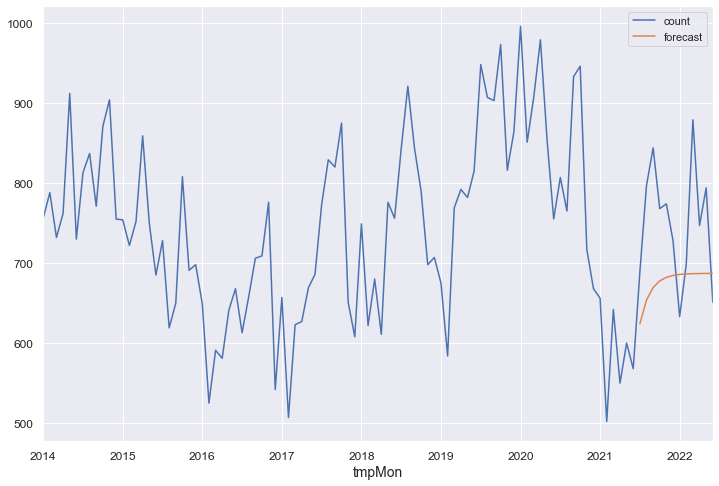

In [495]:
arima_df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
arima_df[['count','forecast']].plot(figsize=(12,8))

C:\Users\Anaconda\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='tmpMon'>

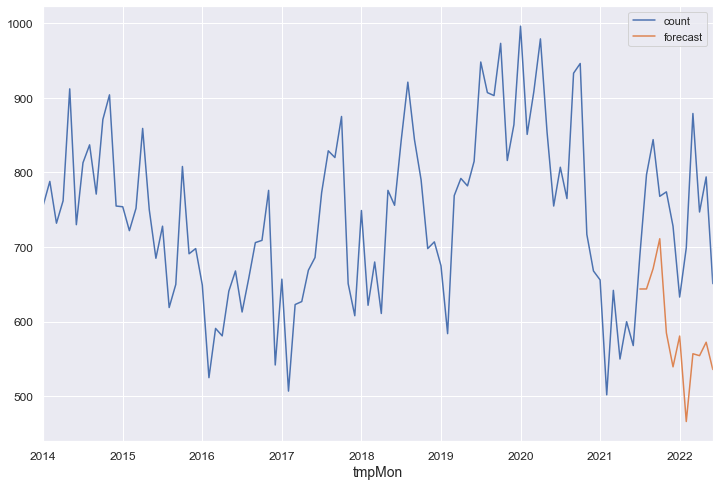

In [496]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(arima_df['count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
arima_df['forecast']=results.predict(start=90,end=103,dynamic=True)
arima_df[['count','forecast']].plot(figsize=(12,8))

C:\Users\Anaconda\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

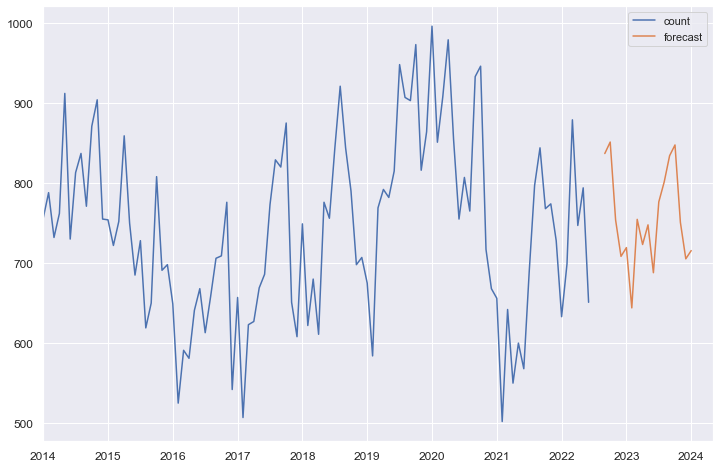

In [497]:
from pandas.tseries.offsets import DateOffset
future_dates=[arima_df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=arima_df.columns)

future_datest_df.tail()

future_df=pd.concat([arima_df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['count', 'forecast']].plot(figsize=(12, 8))


### Time Series forecasting is really useful when we have to take future decisions or we have to do analysis, we can quickly do that using ARIMA, there are lots of other Models from we can do the time series forecasting.

   # Use tensorflow to ML

In 2019, Google released a new version of their TensorFlow deep learning library (TensorFlow 2) that integrated the Keras API directly and promoted this interface as the default or standard interface for deep learning development on the platform.

This integration is commonly referred to as the tf.keras interface or API (“tf” is short for “TensorFlow“). This is to distinguish it from the so-called standalone Keras open source project.

Standalone Keras: The standalone open source project that supports TensorFlow, Theano, and CNTK backends
tf.keras: The Keras API integrated into TensorFlow 2
Nowadays, since the features of other backends are dwarfed by TensorFlow 2, the latest Keras library supports only TensorFlow, and these two are the same.

In [498]:
# example of tf.keras python idiom
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


### MLP for Binary Classification
### Classify structured data with feature columns

In [499]:
# we use the cluster_label to for the location and get the data from the geo_df datasets
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 75856 entries, 0 to 76913
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   event_unique_id  75856 non-null  object             
 1   Division         75856 non-null  object             
 2   occurrencedate   75856 non-null  datetime64[ns, UTC]
 3   reporteddate     75856 non-null  object             
 4   location_type    75856 non-null  object             
 5   premises_type    75856 non-null  object             
 6   Offence          75856 non-null  object             
 7   mci_category     75856 non-null  object             
 8   Hood_ID          75856 non-null  object             
 9   Neighbourhood    75856 non-null  object             
 10  Longitude        75856 non-null  float64            
 11  Latitude         75856 non-null  float64            
 12  tmpMon           75856 non-null  object             
 13  tmpYear 

### We can make the Offence type for the ML model putput. So we want use the data to predict the Offence type.     

In [500]:
#tf_df= df[[ "occurrencedate","premises_type","Hood_ID","Latitude","Latitude"]]
tf_df= geo_df[[ "premises_type","Offence","Hood_ID","tmpYear","cluster_label"]]

# 2022 year we have only half year data.so we drop the 2022 data
tf_df.drop(tf_df.loc[tf_df['tmpYear']=='2022'].index, inplace=True)

C:\Users\Wayne Wang\AppData\Local\Temp\ipykernel_11156\882814362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df.drop(tf_df.loc[tf_df['tmpYear']=='2022'].index, inplace=True)


In [501]:
for col in ['premises_type', 'Offence', 'Hood_ID', 'tmpYear','cluster_label']:
    tf_df[col] = tf_df[col].astype('category')

C:\Users\Wayne Wang\AppData\Local\Temp\ipykernel_11156\1926910800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df[col] = tf_df[col].astype('category')
C:\Users\Wayne Wang\AppData\Local\Temp\ipykernel_11156\1926910800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df[col] = tf_df[col].astype('category')
C:\Users\Wayne Wang\AppData\Local\Temp\ipykernel_11156\1926910800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [502]:
# In the original dataset "4" indicates the pet was not adopted.
tf_df['Offence'] = np.where(tf_df['Offence']=='Theft From Motor Vehicle Under', 0, 1)


C:\Users\Wayne Wang\AppData\Local\Temp\ipykernel_11156\43228467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df['Offence'] = np.where(tf_df['Offence']=='Theft From Motor Vehicle Under', 0, 1)


In [503]:
train, test = train_test_split(tf_df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

45729 train examples
11433 validation examples
14291 test examples


In [504]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(df_tf, shuffle=True, batch_size=32):
  df_tf = df_tf.copy()
  labels = df_tf.pop('Offence')
  ds = tf.data.Dataset.from_tensor_slices((dict(df_tf), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(tf_df))
  ds = ds.batch(batch_size)
  return ds

In [505]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [506]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of tmpYear:', feature_batch['tmpYear'])
  print('A batch of Offence:', label_batch )

Every feature: ['premises_type', 'Hood_ID', 'tmpYear', 'cluster_label']
A batch of tmpYear: tf.Tensor([b'2020' b'2015' b'2021' b'2018' b'2016'], shape=(5,), dtype=string)
A batch of Offence: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int32)


In [507]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

In [508]:
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

In [509]:
# Notice the input to the embedding column is the categorical column
# we previously created
premises_type = feature_column.categorical_column_with_vocabulary_list(
      'premises_type', tf_df.premises_type.unique())
premises_type_embedding = feature_column.embedding_column(premises_type, dimension=8)
demo(premises_type_embedding)

[[-0.5409221  -0.3074287  -0.5327157  -0.06821764  0.27105802  0.10416871
  -0.07327393  0.07268162]
 [-0.14214218  0.20524153 -0.27399588  0.52722234  0.5544521   0.5393576
   0.3427063   0.2564054 ]
 [-0.5409221  -0.3074287  -0.5327157  -0.06821764  0.27105802  0.10416871
  -0.07327393  0.07268162]
 [-0.5409221  -0.3074287  -0.5327157  -0.06821764  0.27105802  0.10416871
  -0.07327393  0.07268162]
 [-0.5409221  -0.3074287  -0.5327157  -0.06821764  0.27105802  0.10416871
  -0.07327393  0.07268162]]


In [510]:
tmpYear = feature_column.categorical_column_with_vocabulary_list(
      'tmpYear', tf_df.tmpYear.unique())
tmpYear_embedding = feature_column.embedding_column(tmpYear, dimension=8)
demo(tmpYear_embedding)

[[ 0.42781377  0.11391507  0.20999987  0.07369341  0.33141258  0.24818036
   0.1250979   0.1745545 ]
 [ 0.42781377  0.11391507  0.20999987  0.07369341  0.33141258  0.24818036
   0.1250979   0.1745545 ]
 [ 0.12085186  0.07430148  0.07540809  0.01107677  0.65679187  0.21742935
   0.42799264 -0.0388163 ]
 [ 0.08207591  0.16187662 -0.10016145 -0.20717372 -0.0471365  -0.31522393
  -0.4685392   0.47888815]
 [ 0.12085186  0.07430148  0.07540809  0.01107677  0.65679187  0.21742935
   0.42799264 -0.0388163 ]]


In [511]:
cluster_label = feature_column.categorical_column_with_vocabulary_list(
      'cluster_label', tf_df.cluster_label.unique())

cluster_label_one_hot = feature_column.indicator_column(cluster_label)
demo(cluster_label_one_hot)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [512]:
Hood_ID = feature_column.categorical_column_with_vocabulary_list(
      'Hood_ID', tf_df.Hood_ID.unique())
Hood_ID_embedding = feature_column.embedding_column(Hood_ID, dimension=8)
demo(Hood_ID_embedding)



[[ 0.60476476  0.22928749 -0.2086823   0.10979228 -0.00579746 -0.09406959
  -0.00288414 -0.20805848]
 [-0.28569695  0.03191692  0.4008414   0.08603521 -0.1555618   0.2241442
   0.01314404  0.07551757]
 [-0.16371015 -0.13858914 -0.08748915  0.03492949  0.44049364  0.27727416
   0.2136229   0.5936624 ]
 [-0.16371015 -0.13858914 -0.08748915  0.03492949  0.44049364  0.27727416
   0.2136229   0.5936624 ]
 [-0.04288428 -0.0434376  -0.32455307  0.37757358  0.31945008  0.29294395
   0.0869141   0.50319713]]


In [513]:
#Hood_ID_hashed = feature_column.categorical_column_with_hash_bucket(
#      'Hood_ID', hash_bucket_size=10)
#demo(feature_column.indicator_column(Hood_ID_hashed))

In [514]:
feature_columns = []



In [515]:
cluster_label=feature_column.categorical_column_with_vocabulary_list(
       'cluster_label',tf_df.cluster_label.unique())
indicator_cluster_label=feature_column.indicator_column(cluster_label)
feature_columns.append(indicator_cluster_label)

In [516]:
Hood_ID = feature_column.categorical_column_with_vocabulary_list(
      'Hood_ID', tf_df.Hood_ID.unique())
Hood_ID_embedding = feature_column.embedding_column(Hood_ID, dimension=8)
feature_columns.append(Hood_ID_embedding)




In [517]:
tmpYear = feature_column.categorical_column_with_vocabulary_list(
      'tmpYear', tf_df.tmpYear.unique())
tmpYear_embedding = feature_column.embedding_column(tmpYear, dimension=8)
feature_columns.append(tmpYear_embedding)

In [518]:
premises_type = feature_column.categorical_column_with_vocabulary_list(
      'premises_type', tf_df.premises_type.unique())
premises_type_embedding = feature_column.embedding_column(premises_type, dimension=8)
feature_columns.append(premises_type_embedding)

In [519]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [520]:
batch_size = 1024
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [442]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10
45/45 [==============================] - 4s 26ms/step - loss: 0.2654 - accuracy: 0.9695 - val_loss: 0.1563 - val_accuracy: 0.9664
Epoch 2/10
45/45 [==============================] - 1s 15ms/step - loss: 0.1385 - accuracy: 0.9695 - val_loss: 0.1445 - val_accuracy: 0.9664
Epoch 3/10
45/45 [==============================] - 1s 15ms/step - loss: 0.1349 - accuracy: 0.9695 - val_loss: 0.1427 - val_accuracy: 0.9664
Epoch 4/10
45/45 [==============================] - 1s 15ms/step - loss: 0.1334 - accuracy: 0.9695 - val_loss: 0.1422 - val_accuracy: 0.9664
Epoch 5/10
45/45 [==============================] - 1s 15ms/step - loss: 0.1327 - accuracy: 0.9695 - val_loss: 0.1417 - val_accuracy: 0.9664
Epoch 6/10
45/45 [==============================] - 1s 14ms/step - loss: 0.1324 - accuracy: 0.9695 - val_loss: 0.1416 - val_accuracy: 0.9664
Epoch 7/10
45/45 [==============================] - 1s 15ms/step - loss: 0.1320 - accuracy: 0.9695 - val_loss: 0.1417 - val_accuracy: 0.9664
Epoch 8/10
45